In [1]:
import sys
sys.path.append(r'D:\github\ripple_heterogeneity\python')
import functions,loading,replay_run

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import importlib
import glob
import os
import pickle

C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\plotting\decoding.py:9: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.


In [2]:
functions.set_plotting_defaults()
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

fig_save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\figures\panels'

In [19]:
save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\replay_test'

sessions = glob.glob(save_path +os.sep+ '*.pkl')
print(sessions)
with open(sessions[1], 'rb') as f:
    results = pickle.load(f)
results.keys()

['Z:\\home\\ryanh\\projects\\ripple_heterogeneity\\replay_test\\Z__Data_GrosmarkAD_Buddy_Buddy_06272013.pkl', 'Z:\\home\\ryanh\\projects\\ripple_heterogeneity\\replay_test\\Z__Data_GrosmarkAD_Cicero_Cicero_09102014.pkl', 'Z:\\home\\ryanh\\projects\\ripple_heterogeneity\\replay_test\\Z__Data_GrosmarkAD_Gatsby_Gatsby_08022013.pkl', 'Z:\\home\\ryanh\\projects\\ripple_heterogeneity\\replay_test\\Z__Data_GrosmarkAD_Gatsby_Gatsby_08282013.pkl']


dict_keys(['outbound_epochs', 'inbound_epochs'])

In [33]:
# import nelpy as nel
basepath = results['outbound_epochs']['session']
epoch_df = loading.load_epoch(basepath)
# behavioral_epochs = nel.EpochArray([np.array([epoch_df.startTime,epoch_df.stopTime]).T])

results['outbound_epochs']['df'].loc[results['outbound_epochs']['df'].start.between(epoch_df.startTime[0],epoch_df.stopTime[0]),'epoch'] = 'pre_sleep'
results['outbound_epochs']['df'].loc[results['outbound_epochs']['df'].start.between(epoch_df.startTime[1],epoch_df.stopTime[1]),'epoch'] = 'linear'
results['outbound_epochs']['df'].loc[results['outbound_epochs']['df'].start.between(epoch_df.startTime[2],epoch_df.stopTime[2]),'epoch'] = 'post_sleep'

results['inbound_epochs']['df'].loc[results['inbound_epochs']['df'].start.between(epoch_df.startTime[0],epoch_df.stopTime[0]),'epoch'] = 'pre_sleep'
results['inbound_epochs']['df'].loc[results['inbound_epochs']['df'].start.between(epoch_df.startTime[1],epoch_df.stopTime[1]),'epoch'] = 'linear'
results['inbound_epochs']['df'].loc[results['inbound_epochs']['df'].start.between(epoch_df.startTime[2],epoch_df.stopTime[2]),'epoch'] = 'post_sleep'

In [34]:
results['outbound_epochs']['df'].keys()

Index(['start', 'stop', 'peaks', 'amplitude', 'duration', 'frequency',
       'detectorName', 'ripple_channel', 'event_spk_thres', 'basepath',
       'basename', 'animal', 'n_active', 'inactive_bin_prop',
       'trajectory_score', 'r_squared', 'slope', 'intercept',
       'score_pval_time_swap', 'score_pval_col_cycle', 'traj_dist',
       'traj_speed', 'traj_step', 'replay_type', 'epoch'],
      dtype='object')

In [35]:
display(results['outbound_epochs']['df'][results['outbound_epochs']['df'].score_pval_col_cycle < 0.05])
display(results['inbound_epochs']['df'][results['inbound_epochs']['df'].score_pval_col_cycle < 0.05])



,start,stop,peaks,amplitude,duration,frequency,detectorName,ripple_channel,event_spk_thres,basepath,...,r_squared,slope,intercept,score_pval_time_swap,score_pval_col_cycle,traj_dist,traj_speed,traj_step,replay_type,epoch
4054,13820.9720,13821.0584,13820.9728,677.972912,0.0864,139.482434,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Cicero\Cicero_09102014,...,0.020408,0.863617,-6.477129,0.259827,0.033977,2.590852,43.180859,1.295426,reverse,pre_sleep
4195,14121.2480,14121.3576,14121.2976,759.079707,0.1096,143.607902,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Cicero\Cicero_09102014,...,0.892857,4.318086,-93.270655,0.703531,0.049300,12.954258,215.904295,6.477129,reverse,pre_sleep
4541,15293.7880,15293.8768,15293.8552,758.408734,0.0888,140.934474,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Cicero\Cicero_09102014,...,0.979592,-12.090641,736.521518,0.563624,0.007995,24.181281,604.532026,12.090641,forward,pre_sleep
6886,21957.3768,21957.4872,21957.4800,754.729369,0.1104,161.697379,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Cicero\Cicero_09102014,...,0.480769,1.162562,-128.579312,0.487009,0.043971,4.650246,58.128079,2.325123,reverse,post_sleep
7734,23231.9320,23232.0296,23231.9528,630.257314,0.0976,161.020578,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Cicero\Cicero_09102014,...,0.450667,-3.929458,573.700892,0.664224,0.001332,11.788374,196.472908,3.929458,forward,post_sleep


,start,stop,peaks,amplitude,duration,frequency,detectorName,ripple_channel,event_spk_thres,basepath,...,r_squared,slope,intercept,score_pval_time_swap,score_pval_col_cycle,traj_dist,traj_speed,traj_step,replay_type,epoch
76,623.1344,623.2376,623.2312,265.626283,0.1032,149.551190,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Cicero\Cicero_09102014,...,0.001776,0.604577,99.755281,0.310460,0.012658,2.418310,30.228873,0.604577,reverse,pre_sleep
189,950.5560,950.6376,950.6008,527.252950,0.0816,164.045091,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Cicero\Cicero_09102014,...,0.007692,0.604577,72.851584,0.811459,0.018654,1.813732,30.228873,0.604577,reverse,pre_sleep
293,1225.9696,1226.0608,1225.9920,190.517361,0.0912,185.744970,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Cicero\Cicero_09102014,...,0.487805,-6.045775,518.425172,0.090606,0.009327,18.137324,302.288730,6.045775,forward,pre_sleep
338,1312.4880,1312.5960,1312.5704,190.617690,0.1080,141.229009,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Cicero\Cicero_09102014,...,0.807563,18.741901,-1327.652102,0.588274,0.013324,74.967605,937.095063,18.741901,reverse,pre_sleep
526,1928.1464,1928.2344,1928.2096,190.328716,0.0880,142.422635,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Cicero\Cicero_09102014,...,0.454545,-3.022887,565.279925,0.324450,0.007995,9.068662,151.144365,3.022887,forward,pre_sleep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12169,35518.6088,35518.6984,35518.6520,398.187390,0.0896,165.843078,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Cicero\Cicero_09102014,...,0.838017,11.789260,-106104.855626,0.081279,0.011992,35.367781,589.463023,11.789260,reverse,post_sleep
12224,35621.2520,35621.3760,35621.3288,336.280589,0.1240,155.689085,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Cicero\Cicero_09102014,...,0.024051,2.850151,-25584.048310,0.247835,0.047968,14.250754,142.507544,2.850151,reverse,post_sleep
12301,35811.2024,35811.2952,35811.2408,412.479802,0.0928,141.437324,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Cicero\Cicero_09102014,...,0.701565,-32.949472,301273.342020,0.169221,0.043304,98.848415,1647.473578,32.949472,forward,post_sleep
12341,35881.5584,35881.6400,35881.6152,532.545755,0.0816,149.494876,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Cicero\Cicero_09102014,...,0.750000,-10.580106,97337.474831,0.266489,0.025983,21.160211,529.005277,10.580106,forward,post_sleep


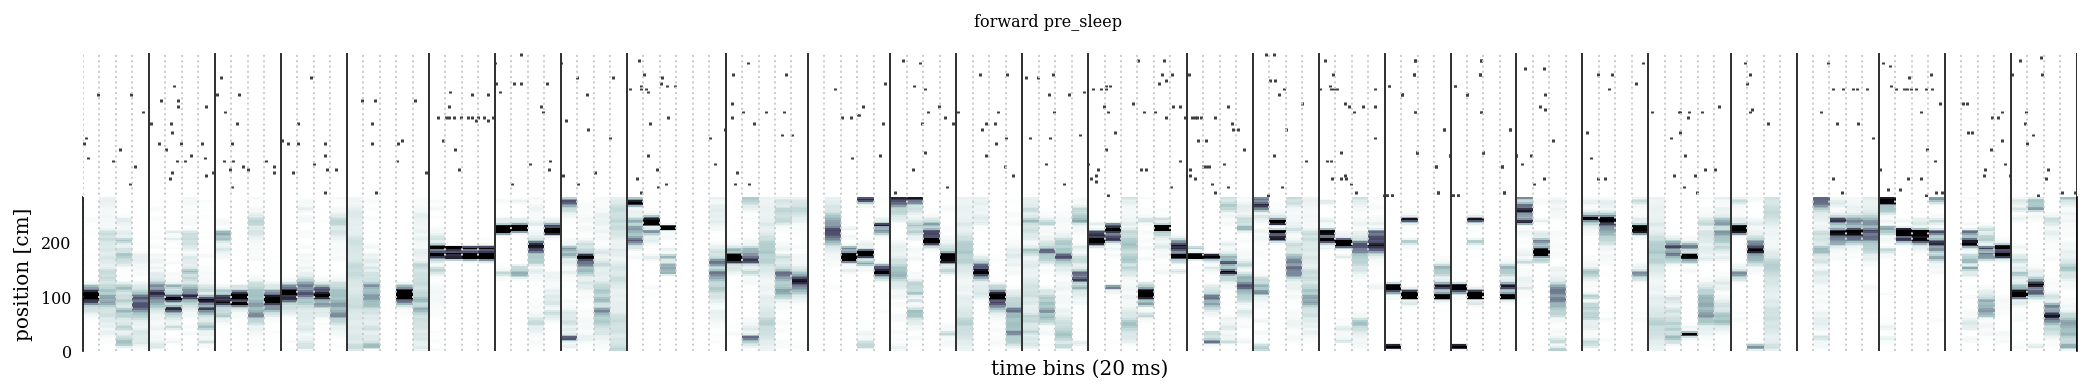

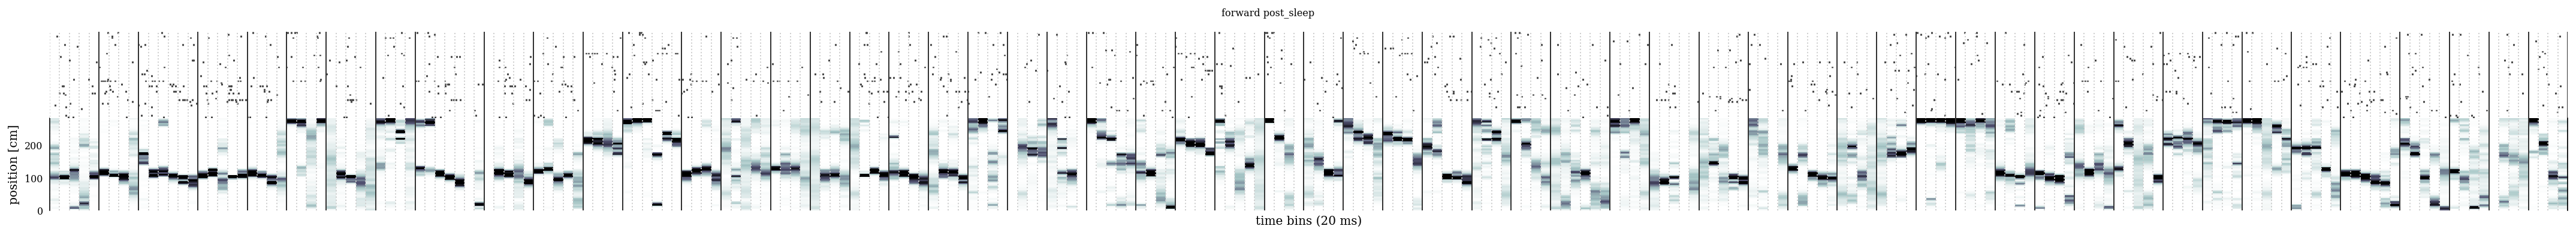

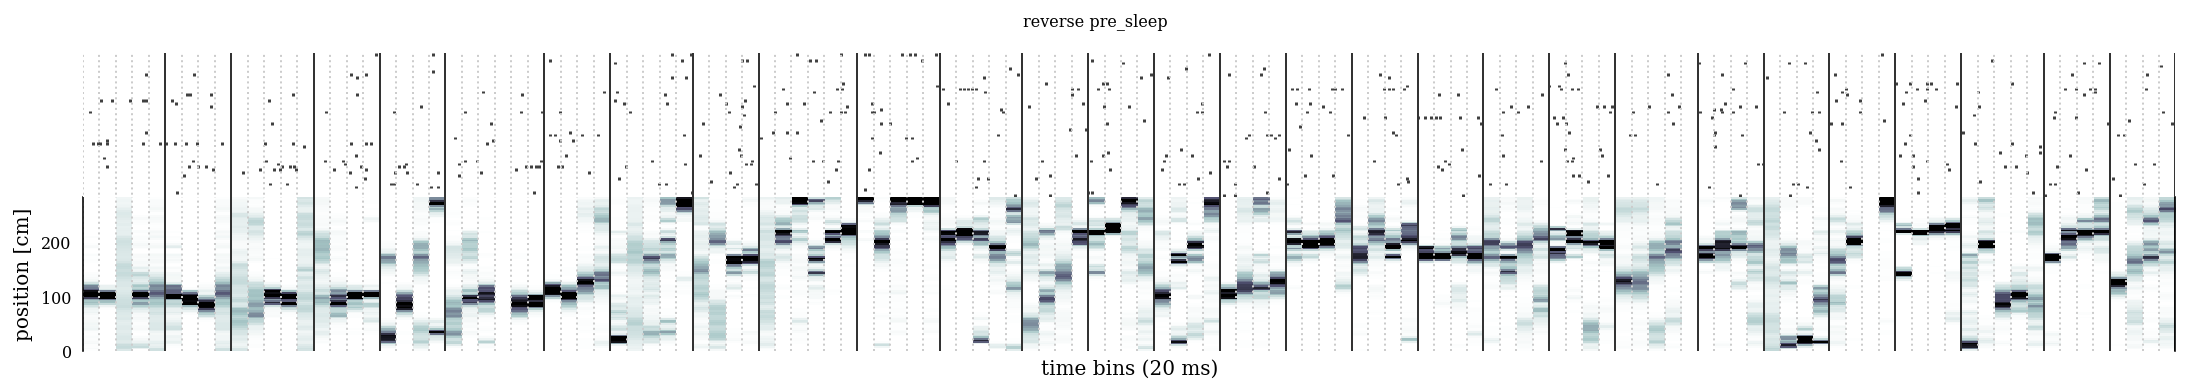

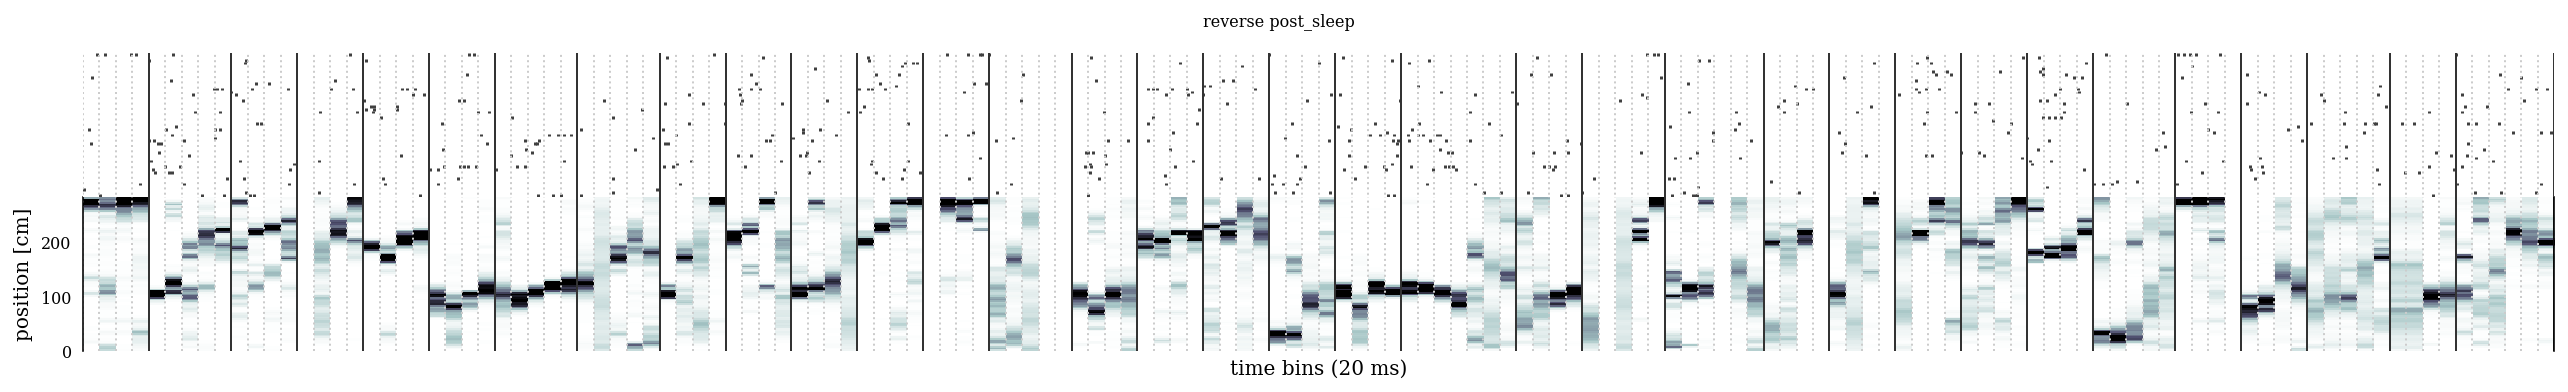

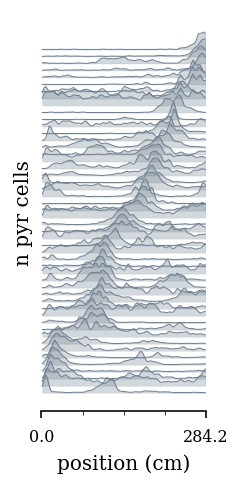

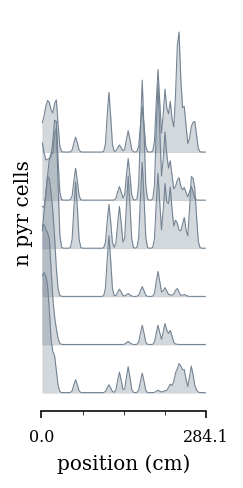

In [41]:
import importlib
import replay_fig
from matplotlib.ticker import AutoMinorLocator
import nelpy.plotting as npl
import warnings
warnings.filterwarnings("ignore")

importlib.reload(replay_fig)
idx = np.where(
                (results['inbound_epochs']['df'].score_pval_col_cycle < 0.05) &
                (results['inbound_epochs']['df'].replay_type == 'forward') &
                (results['inbound_epochs']['df'].epoch == 'pre_sleep') 
            )[0]

ax,fig = replay_fig.plot_all_replay(results['inbound_epochs']['bst_placecells'][idx],
                                        results['inbound_epochs']['sta_placecells'],
                                        results['inbound_epochs']['tc'],
                                        results['inbound_epochs']['tc'],
                                        vmax=.1,
                                        title_str="forward pre_sleep")

idx = np.where(
                (results['inbound_epochs']['df'].score_pval_col_cycle < 0.05) &
                (results['inbound_epochs']['df'].replay_type == 'forward') &
                (results['inbound_epochs']['df'].epoch == 'post_sleep') 
            )[0]

ax,fig = replay_fig.plot_all_replay(results['inbound_epochs']['bst_placecells'][idx],
                                        results['inbound_epochs']['sta_placecells'],
                                        results['inbound_epochs']['tc'],
                                        results['inbound_epochs']['tc'],
                                        vmax=.1,
                                        title_str="forward post_sleep")



idx = np.where(
                (results['inbound_epochs']['df'].score_pval_col_cycle < 0.05) &
                (results['inbound_epochs']['df'].replay_type == 'reverse') &
                (results['inbound_epochs']['df'].epoch == 'pre_sleep') 
            )[0]

ax,fig = replay_fig.plot_all_replay(results['inbound_epochs']['bst_placecells'][idx],
                                        results['inbound_epochs']['sta_placecells'],
                                        results['inbound_epochs']['tc'],
                                        results['inbound_epochs']['tc'],
                                        vmax=.1,
                                        title_str="reverse pre_sleep")

idx = np.where(
                (results['inbound_epochs']['df'].score_pval_col_cycle < 0.05) &
                (results['inbound_epochs']['df'].replay_type == 'reverse') &
                (results['inbound_epochs']['df'].epoch == 'post_sleep') 
            )[0]

ax,fig = replay_fig.plot_all_replay(results['inbound_epochs']['bst_placecells'][idx],
                                        results['inbound_epochs']['sta_placecells'],
                                        results['inbound_epochs']['tc'],
                                        results['inbound_epochs']['tc'],
                                        vmax=.1,
                                        title_str="reverse post_sleep")


tc = results['inbound_epochs']['tc'].reorder_units()

w,h = functions.set_size('thesis', fraction=.25, subplots=(4,1))

npl.set_palette(npl.colors.rainbow)
with npl.FigureManager(show=True, figsize=(w,h)) as (fig, ax):
    npl.utils.skip_if_no_output(fig)
    ax1 = npl.plot_tuning_curves1D(tc, normalize=True, pad=.4,fill=True,color='slategrey')
    leg_lines = ax1.get_lines()
    plt.setp(leg_lines, linewidth=.5)
    ax.set_xlabel('position (cm)')
    ax.set_ylabel('n pyr cells')
    # ax.set_yticks([0,tc.ratemap.shape[0]])
    ax.set_yticks([])
    ax.set_xticks([0,tc.bins.max()])

    ax.xaxis.set_minor_locator(AutoMinorLocator())

tc = results['outbound_epochs']['tc'].reorder_units()
w,h = functions.set_size('thesis', fraction=.25, subplots=(4,1))
npl.set_palette(npl.colors.rainbow)
with npl.FigureManager(show=True, figsize=(w,h)) as (fig, ax):
    npl.utils.skip_if_no_output(fig)
    ax1 = npl.plot_tuning_curves1D(tc, normalize=True, pad=.4,fill=True,color='slategrey')
    leg_lines = ax1.get_lines()
    plt.setp(leg_lines, linewidth=.5)
    ax.set_xlabel('position (cm)')
    ax.set_ylabel('n pyr cells')
    # ax.set_yticks([0,tc.ratemap.shape[0]])
    ax.set_yticks([])
    ax.set_xticks([0,tc.bins.max()])

    ax.xaxis.set_minor_locator(AutoMinorLocator())

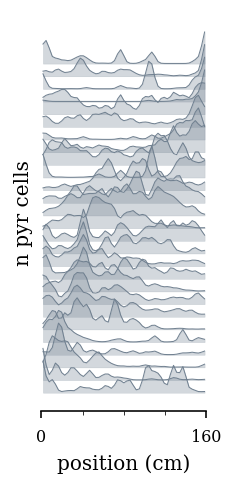

In [17]:
save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\replay'

# sessions = glob.glob(save_path +os.sep+ '*.pkl')
session = 'Z:\\home\\ryanh\\projects\\ripple_heterogeneity\\replay\\Z__Data_GrosmarkAD_Buddy_Buddy_06272013.pkl'

with open(session, 'rb') as f:
    results = pickle.load(f)

tc = results['tc'].reorder_units()
w,h = functions.set_size('thesis', fraction=.25, subplots=(4,1))
npl.set_palette(npl.colors.rainbow)
with npl.FigureManager(show=True, figsize=(w,h)) as (fig, ax):
    npl.utils.skip_if_no_output(fig)
    ax1 = npl.plot_tuning_curves1D(tc, normalize=True, pad=.4,fill=True,color='slategrey')
    leg_lines = ax1.get_lines()
    plt.setp(leg_lines, linewidth=.5)
    ax.set_xlabel('position (cm)')
    ax.set_ylabel('n pyr cells')
    # ax.set_yticks([0,tc.ratemap.shape[0]])
    ax.set_yticks([])
    ax.set_xticks([0,tc.bins.max()])

    ax.xaxis.set_minor_locator(AutoMinorLocator())    

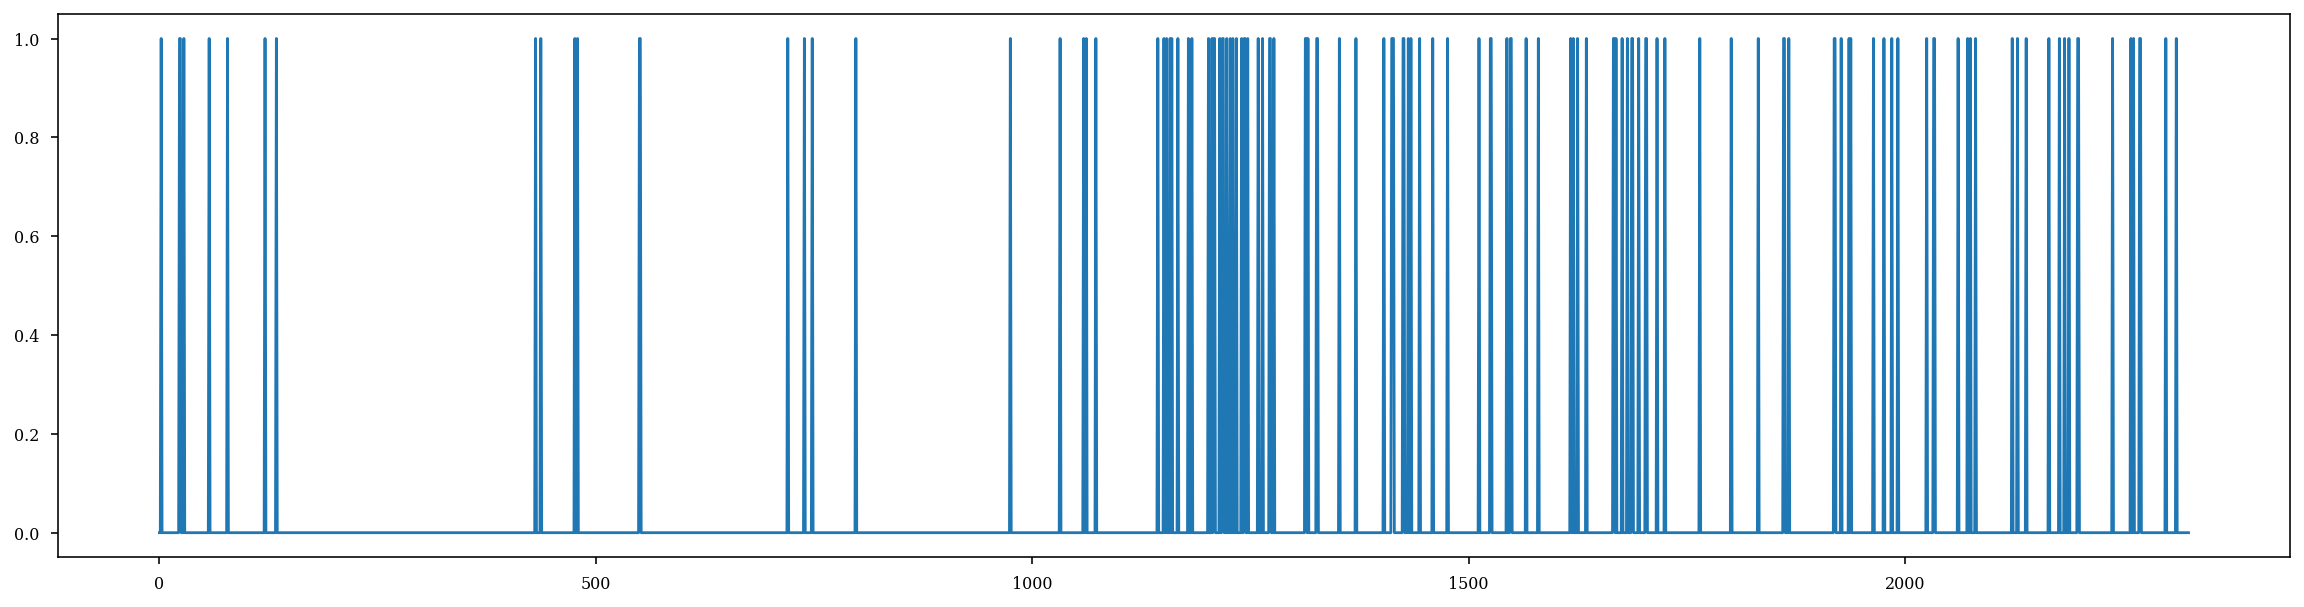

In [49]:
plt.figure(figsize=(20,5))

plt.plot((results['df']['score_pval_col_cycle'] < 0.05) & (results['df']['score_pval_time_swap'] < 0.05))

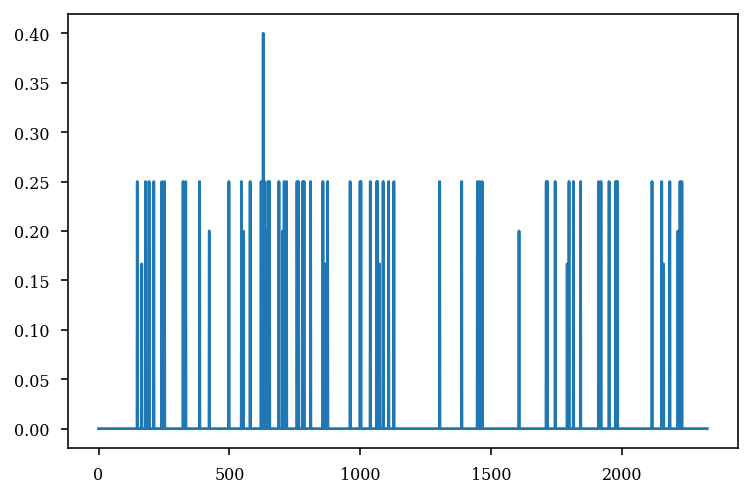

In [46]:
plt.plot(results['df'].inactive_bin_prop)


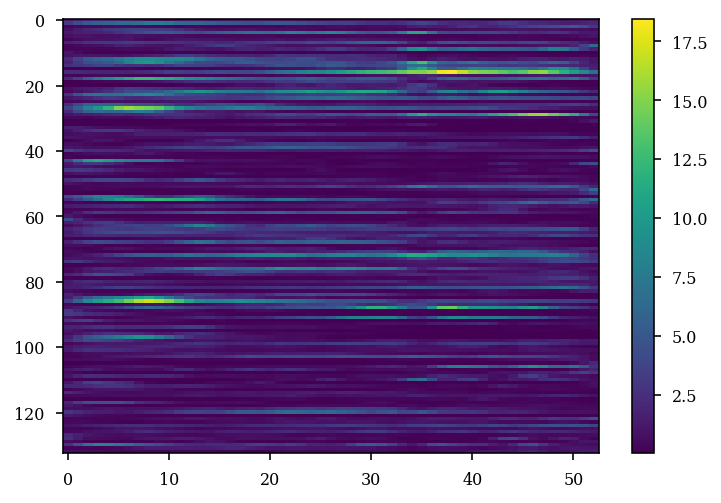

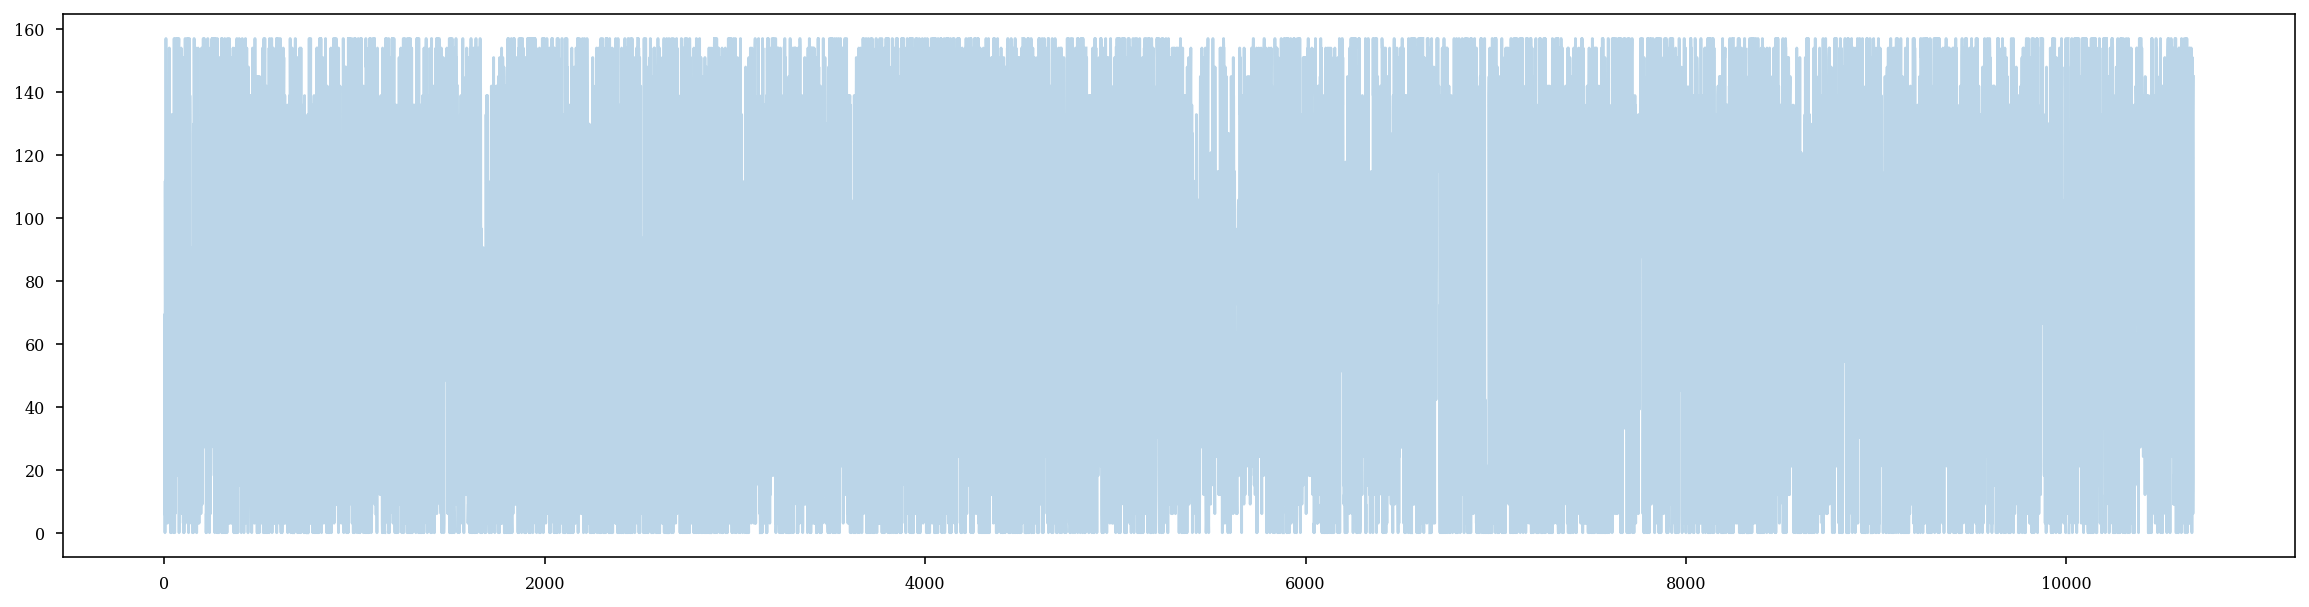

In [38]:
tc = results['tc']

# plt.imshow(tc.ratemap)
plt.imshow(tc.ratemap,aspect='auto',interpolation='nearest')
plt.colorbar()

plt.figure(figsize=(20,5))
mode_pth = results['mode_pth']
plt.plot(mode_pth,alpha=.3)

In [14]:
# plt.plot(results['tc'])
plt.imshow(tc.ratemap[np.array(tc.get_peak_firing_order_ids())-1,:],aspect='auto',interpolation='nearest',vmax=5)
plt.colorbar()
plt.show()

IndexError: index 199 is out of bounds for axis 0 with size 133